In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
import multiprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
from IPython.display import Image  


columnas = ['clase','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids',
            'nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
Vinos = pd.read_csv('C:/Juan/ITAcademy/Sprint_7/wineData.txt', names = columnas)
Vinos.head()

,clase,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
Vinos['clase'].value_counts()

2    71
1    59
3    48
Name: clase, dtype: int64

In [3]:
Vinos['clase'].value_counts(normalize=True).round(3)

2    0.399
1    0.331
3    0.270
Name: clase, dtype: float64

- La clase que más se repite es la 2 y no parece haber desequilibrios importantes. 

In [4]:
Vinos.isnull().sum()

clase                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
Vinos.duplicated().sum()

0

In [6]:
round(Vinos.describe(),2)

,clase,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [7]:
Vinos.shape

(178, 14)

In [8]:
Vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   clase                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

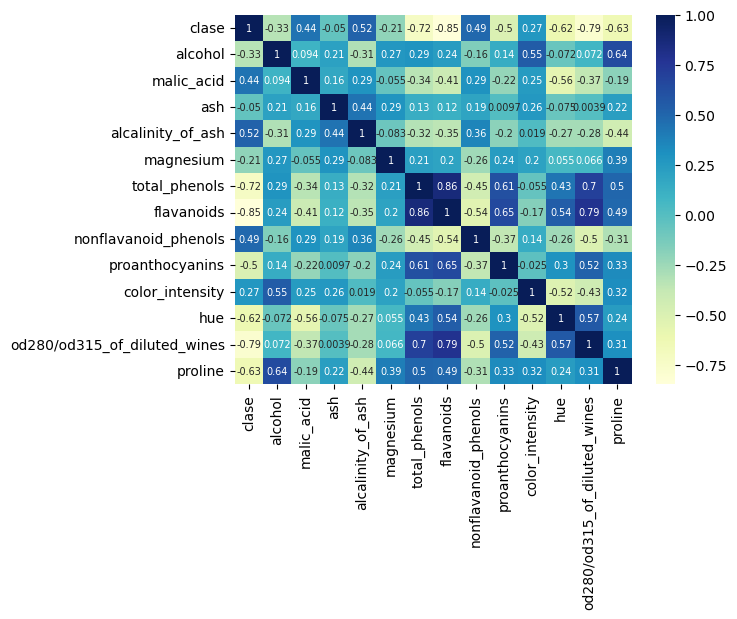

In [9]:
sns.heatmap(Vinos.corr(),annot = True, annot_kws = {'size': 7},cmap="YlGnBu")
plt.show()

- Algunas variables tienen una corrrelación alta. flavanoids / total phenols tienen una correlación de 0.86 y flavanoids / od280/od315_of_diluted_wines de 0.79. 
- Para hacer una reducción de variables y tener un modelo más simple podría usar flavanoids y dejar fuera del análsis tanto a total phenols como a od280/od315_of_diluted_wines. Por el momento no reduciré variables. 

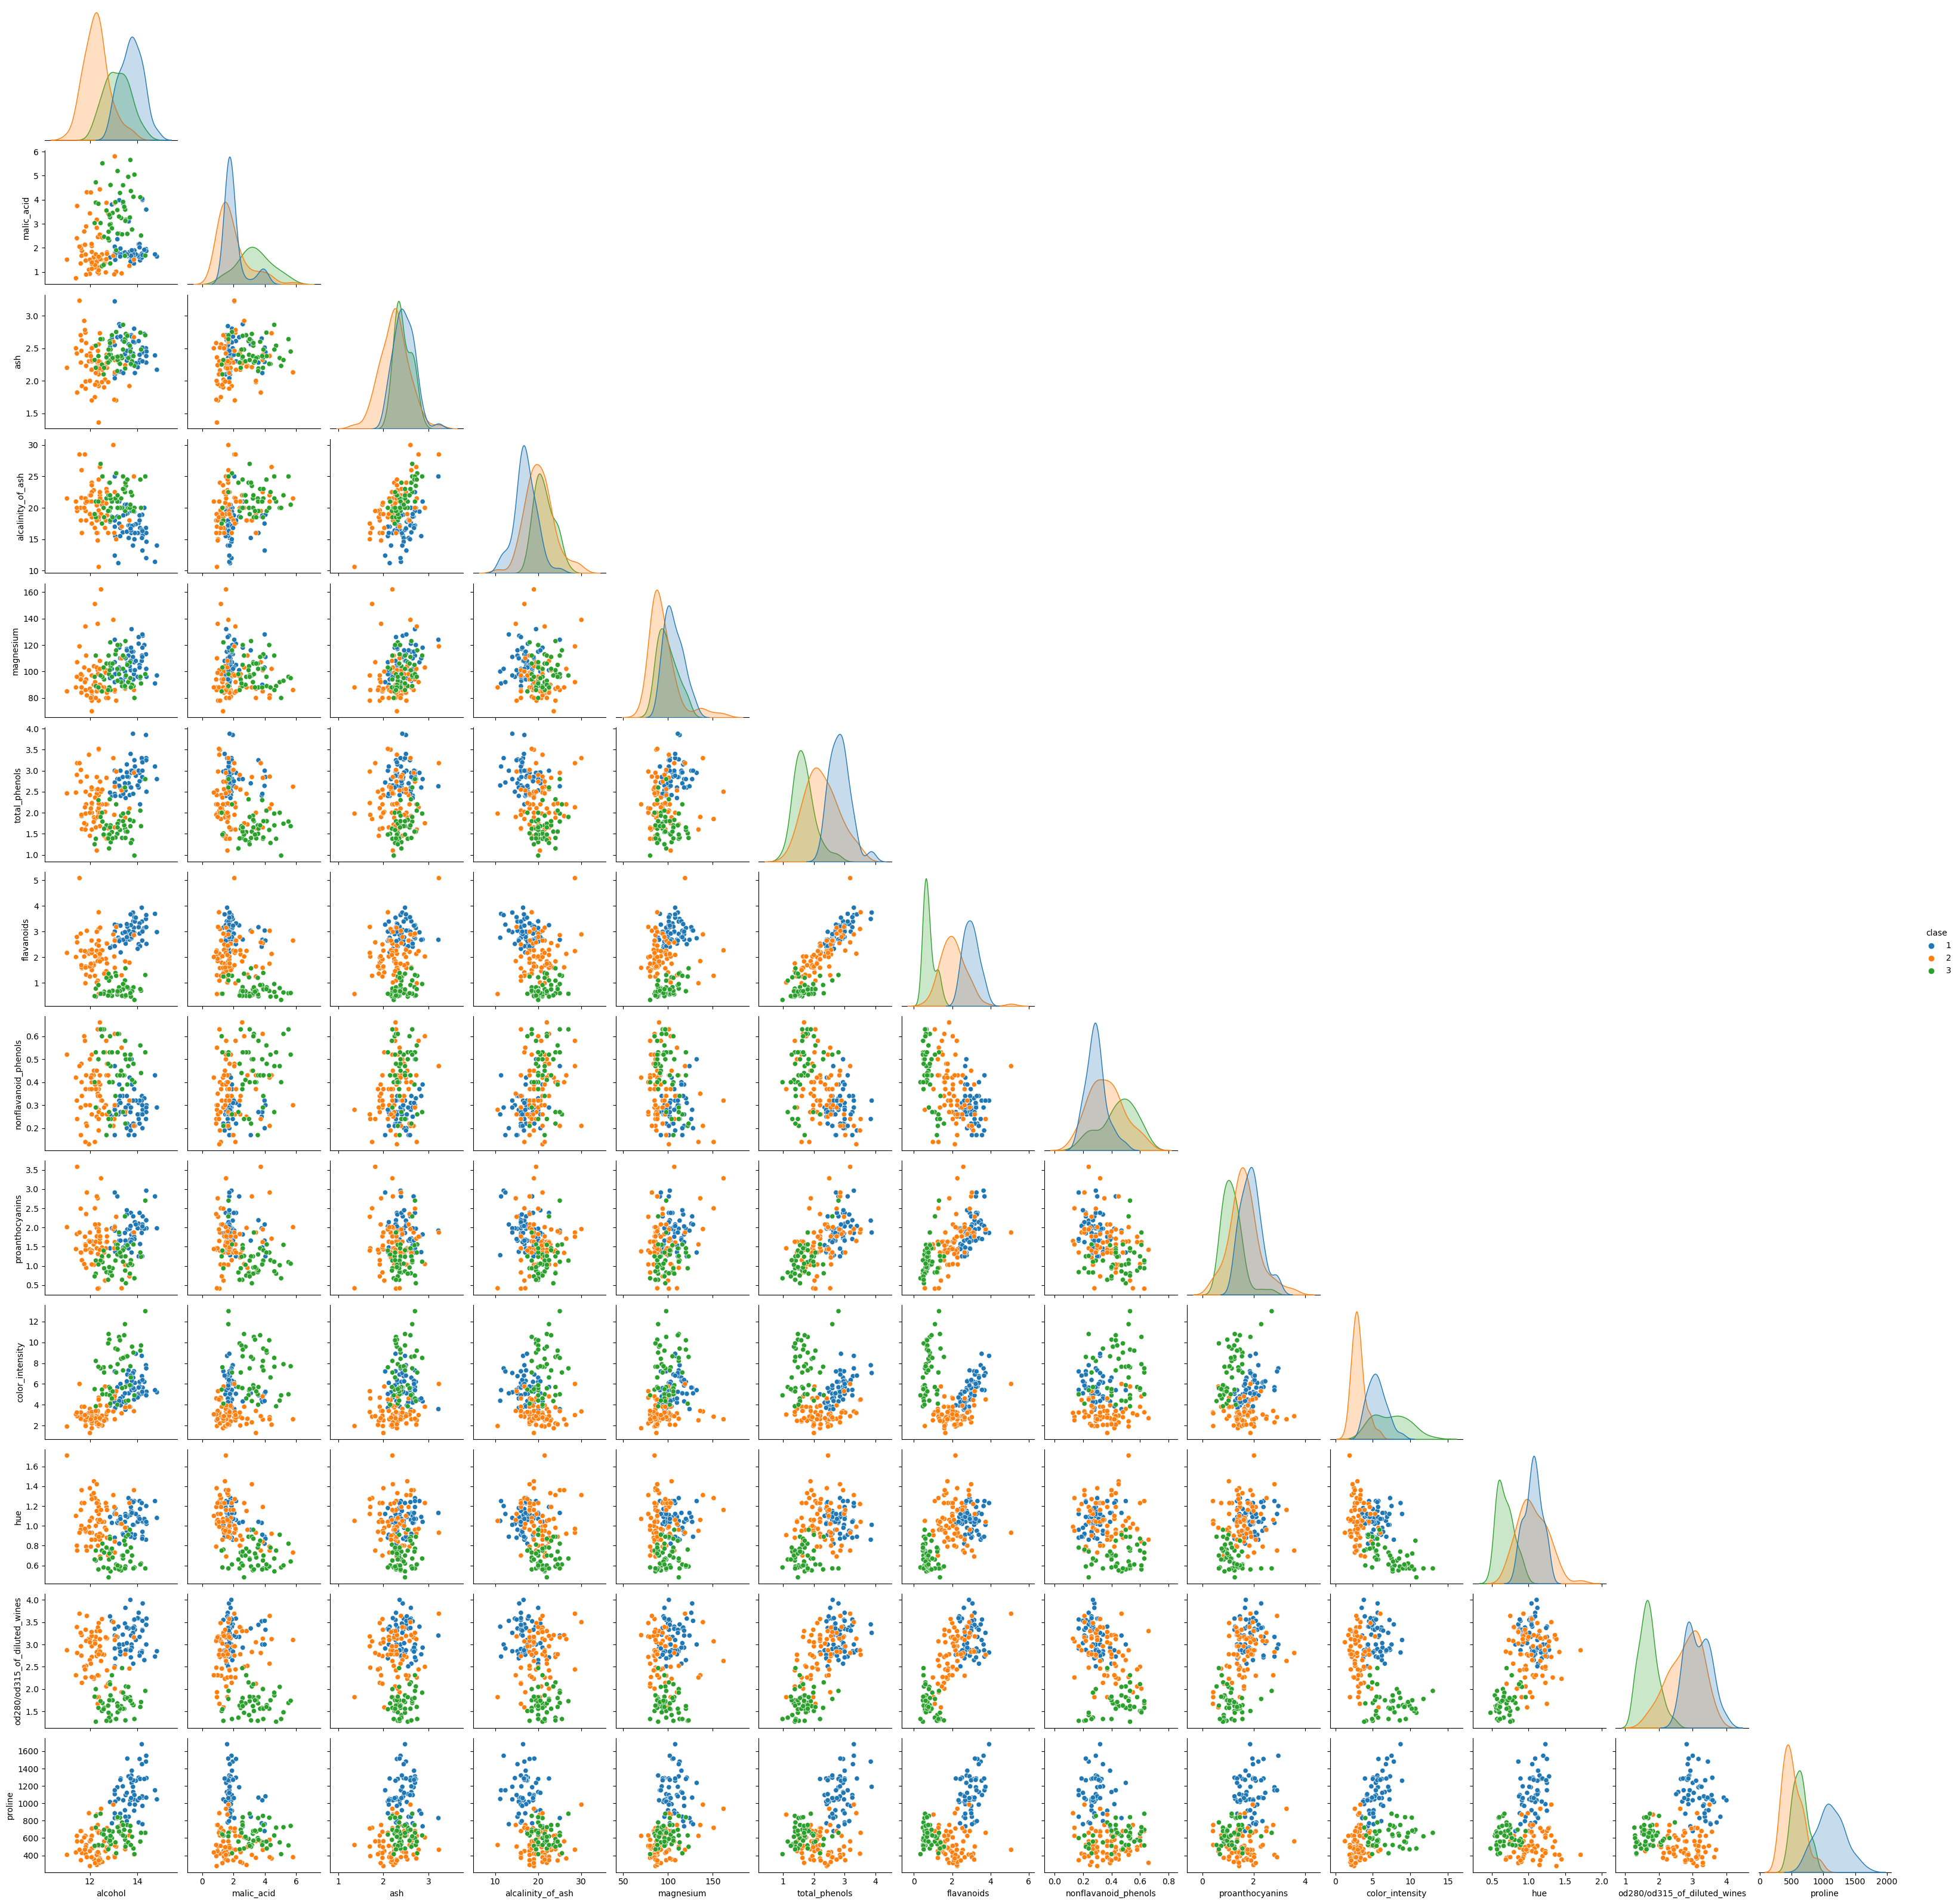

In [10]:
sns.pairplot(Vinos, 
             hue='clase', 
             palette="tab10", 
             corner=True)

plt.show()

- Algunas variables separan bien las clases de vinos. Por ejemplo, proline parace ser una variable explicativa muy buena, especialmente para la clase 0 (puntos azules). También color intensity, total phenols y flavanoids separan bien por clases de vino. 

## Ejercicio 1

**Random Forest**

In [11]:
XRF = Vinos.drop('clase',axis=1)
yRF = Vinos['clase']

In [12]:
modeloRF = RandomForestClassifier(
            n_estimators = 2,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modeloRF.fit(XRF,yRF)

RandomForestClassifier(max_features=1, n_estimators=2, n_jobs=-1,
                       random_state=123)

In [13]:
yRF_pred = modeloRF.predict(XRF)
rmse = mean_squared_error(
        y_true  = yRF,
        y_pred  = yRF_pred,
        squared = False
       )

In [14]:
print(f"RMSE Random Forest: {(rmse):6.3f}")
print('Accuracy Random Forest: ', metrics.accuracy_score(yRF,yRF_pred))

RMSE Random Forest:  0.327
Accuracy Random Forest:  0.9269662921348315


- El modelo Random Forest utilizando gini como criterio, todos los cores disponibles (-1 n_jobs), con la profundidad de los árboles por defecto, 1 predictor por división y 2 árboles tiene una precisión alta de 0.927, es decir un alto porcentaje de valores (positivos y negativos) correctamente clasificados. La raíz del error cuadrático medio es 0.327, las predicciones del modelo se alejan en promedio 0.327 unidades del valor real. 

**KNeighbors**

In [15]:
XKN = Vinos.drop('clase',axis=1)
yKN = Vinos['clase']

In [16]:
ModeloKN = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree',metric='euclidean')
ModeloKN.fit(XKN, yKN)
yKN_pred = ModeloKN.predict(XKN)

rmseKN = mean_squared_error(
        y_true  = yKN,
        y_pred  = yKN_pred,
        squared = False)

In [17]:
print(f"RMSE KNeighbords: {(rmseKN):6.3f}")
print('Accuracy KNeighbords: ', metrics.accuracy_score(yKN,yKN_pred))

RMSE KNeighbords:  0.576
Accuracy KNeighbords:  0.7865168539325843


- El modelo K Neighbords con valores de k (=5) el algoritmo (ball_tree) y las métricas (euclidean) por defecto, nos da que un 78,7% de valores están correctamente clasificados y que las predicciones del modelo se alejan en promedio 0.576 unidades del valor real. 

## Ejercicio 2

- Comparo los modelos con la precisión, la matriz de confusión y otras métricas. 

**Random Forest**

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        59
           2       0.89      0.96      0.93        71
           3       1.00      0.79      0.88        48

    accuracy                           0.93       178
   macro avg       0.94      0.92      0.92       178
weighted avg       0.93      0.93      0.93       178



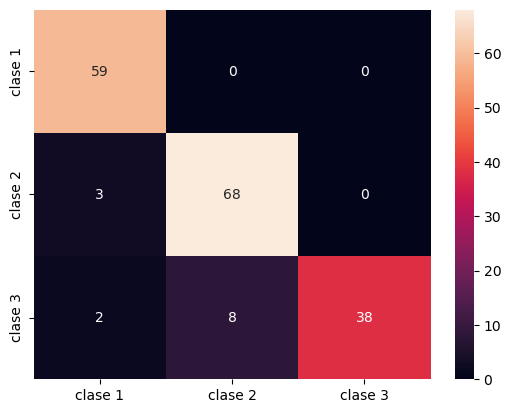

In [18]:
from sklearn.metrics import confusion_matrix
classes_names = ['clase 1','clase 2','clase 3']
cmRF = pd.DataFrame(confusion_matrix(yRF, yRF_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmRF, annot=True, fmt='d');

print(classification_report(yRF, yRF_pred))

- La accuracy (exactitud) del modelo es alta, 93% de valores correctamente clasificados. . 
- La precision (de los positivos pronosticados, qué porcentaje es realmente positivo) la peor precisión es para la Clase 2 donde el modelo clasifica correctamente el 89% de valores, y la mejor para la Clase 3, todos los valores están correctamente clasificados. 
- El recall (la sensibilidad), de los casos positivos, qué porcentaje se pronostican positivos. El más alto es para la clase 1 y el más bajo para la clase 3. En la clase 3 es donde el modelo más se equivoca a la hora de pronosticar aspectos positivos.  
- F1-score es la "media armónica" de precisión y recall. En este modelo es importante porque nuestros datos no están equilibrados entre clases. Todas las clases tienen un  buen F1. El más alto es para la clase 1 y el más bajo para la clase 3. 
- Según la matriz de confusión: 
    - La clase 1 se confundió con la clase 2 en 0 casos. 
    - La clase 2 se confundió con la clase 1 en 3 casos y cero con la 3. 
    - La clase 3 se cinfundió en 8 casos con la clase 2 y 2 casos con la clase 1. 
- La diagonal muestra los positivos verdaderos, clase 1 muestra todos los positivos como verdaderos y la que menos positivos como verdaderos clasifica es la clase 3.

**KNeighbors**

              precision    recall  f1-score   support

           1       0.87      0.90      0.88        59
           2       0.80      0.75      0.77        71
           3       0.67      0.71      0.69        48

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



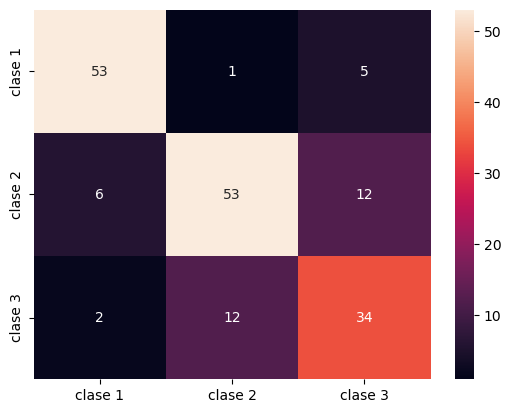

In [19]:
cmKN = pd.DataFrame(confusion_matrix(yKN, yKN_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmKN, annot=True, fmt='d');

print(classification_report(yKN, yKN_pred))

- La accuracy (exactitud) del modelo está bien, 79% de valores son correctamente clasificados. . 
- La peor precisión es para la Clase 3 donde el modelo clasifica correctamente el 67% de valores positivos pronosticados, y la mejor para la Clase 1, 87% de valores positivos pronosticados están correctamente clasificados. 
- El recall más alto es para la clase 1 y el más bajo para la clase 3. En la clase 3 el 71% de los casos positivos se pronostican positivos, es donde el modelo más se equivoca a la hora de pronosticar aspectos positivos. 
- El F1-score en este modelo es importante porque nuestros datos no están equilibrados entre clases. Todas las clases tienen un buen F1. El más alto para la clase 1 y el más bajo para la clase 3. 
- La diagonal muestra los positivos verdaderos (el recall), clase 1 muestra 53/59 positivos como verdaderos y la que menos positivos como verdaderos clasifica es la clase 3 con 34 de 48. 


- Según la matriz de confusión: 
    - La clase 1 se confundió con la clase 2 en 1 caso. 
    - La clase 2 se confundió con la clase 1 en 6 casos y 12 con la 3. 
    - La clase 3 se cinfundió en 12 casos con la clase 2 y 2 casos con la clase 1. 


- **Comparativa.** 
- La exactitud (accuracy) de ambos modelos es buena, pero el Random Forest con 93% clasfifica mejor que el KNeighbors con 79%.
- Tanto el recall (sensibilidad) como el F1-score muestran, proporcionalmente, resultados similares. En ambos modelos la clase 1 muestra los mejores resultados en ambos indicadores y la clase 3 los más bajos. 
- La presición (presicion) que mide la clasificación de los valores positivos pronosticados, muestra resultados dispares. En el Random Forest la peor precisión es para la clase 2 y la mejor para la clase 3, mientras que en el KNeighbor la precisión más alta es para la Clase 1 y la peor para la Clase 3.
- Los diferentes indicadores de clasificación son similares (salvo la precisión) y al tener observaciones desequilibradas la exactitud no es una buena medida, puede mostrar altos niveles de exactitud debido a predicciones desequilibardas de una clase.
- Debido a lo anterior usaré el F1-score (penaliza las diferencias altas entre presiciones) y el recall para decidirme por uno de los dos modelos. El Random Forest muestra un F1-score y un recall más alto para todas las clases, lo considero mejor modelo para clasificar los vinos.  

## Ejercicio 3

**Random Forest**

- Hago una validación cruzada con grid para encontrar los mejores hiperparámetros del modelo Rain Forest.   

In [20]:
param_grid = {'n_estimators': [1, 4, 30, 150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }
grid = GridSearchCV(
            estimator  = RandomForestClassifier(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X = XRF, y = yRF)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
15,3,5,150,-0.096791,0.106144,-0.005575,0.02086
3,None,5,150,-0.096948,0.106249,0.000000,0.00000
39,20,5,150,-0.096948,0.106249,0.000000,0.00000
27,10,5,150,-0.096948,0.106249,0.000000,0.00000


In [21]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 3, 'max_features': 5, 'n_estimators': 150} : -0.09679067658692173 neg_root_mean_squared_error


- La validación me arroja que los valores óptimos serían: 3 de profundidad máxima que pueden alcanzar los árboles, 5 predictores considerados a en cada división y 150 árboles. 
- Corro el modelo con esta información. 

In [22]:
modeloRFO = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = 3,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modeloRFO.fit(XRF,yRF)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=150, n_jobs=-1,
                       random_state=123)

In [23]:
yRFO_pred = modeloRFO.predict(XRF)
rmse = mean_squared_error(
        y_true  = yRF,
        y_pred  = yRFO_pred,
        squared = False
       )
print(f"RMSE Random Forest óptimo: {(rmse):6.3f}")

RMSE Random Forest óptimo:  0.000


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



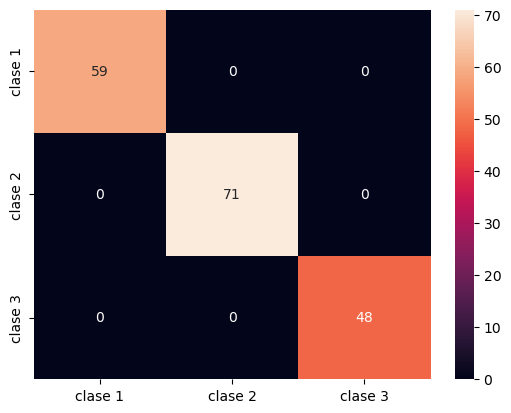

In [24]:
classes_names = ['clase 1','clase 2','clase 3']
cmRFO = pd.DataFrame(confusion_matrix(yRF, yRFO_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmRFO, annot=True, fmt='d');

print(classification_report(yRF, yRFO_pred))

- El modelo Random Forest muestra 1 para todos los indicadores de clasificación y un error ciuadrático medio de 0, es decir, clasificación perfecta pero seguramente sobreajustada. 
- Teniendo en cuenta lo anterior, el Random Forest con los hiperparámetros óptimos mejora la clasificación de los vinos en relación al mismo modelo sin los parámetros óptimos. 

**K-Neighbors**

- Busco encontrar la mejor K (el número de vecinos) para el modelo.

In [25]:
maeKN = mean_absolute_error(yKN, yKN_pred)
mseKN = mean_squared_error(yKN, yKN_pred)
rmseKN = mean_squared_error(yKN, yKN_pred, squared=False)

print(f'mae: {maeKN}')
print(f'mse: {mseKN}')
print(f'rmse: {rmseKN}')

mae: 0.25280898876404495
mse: 0.33146067415730335
rmse: 0.5757262145823338


In [26]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XKN, yKN)
    pred_i = knn.predict(XKN)
    mae = mean_absolute_error(yKN, pred_i)
    error.append(mae)

Text(0, 0.5, 'Error absoluto medio')

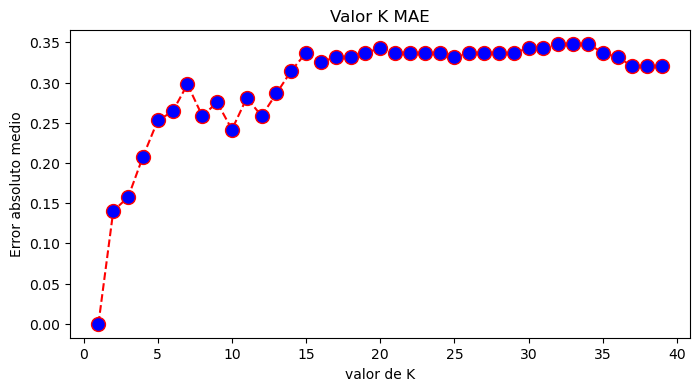

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('Valor K MAE')
plt.xlabel('valor de K')
plt.ylabel('Error absoluto medio')

- Hago un acercamiento del gáfico para dterminar con mayor exactitud la K. 

Text(0, 0.5, 'Error absoluto medio')

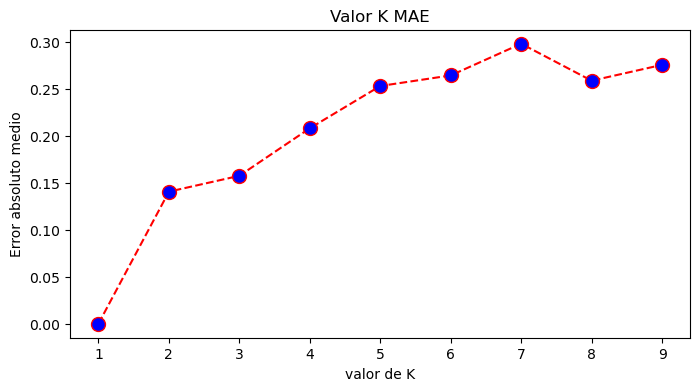

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), error[:9], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('Valor K MAE')
plt.xlabel('valor de K')
plt.ylabel('Error absoluto medio')

- La k que minimiza el error absoluto medio es 1.  
- Cargo el modelo con esa k, dejo ball_tree como algoritmo y como métrica euclidean. 

In [29]:
ModeloKNO = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree',metric='euclidean')
ModeloKNO.fit(XKN, yKN)
yKNO_pred = ModeloKNO.predict(XKN)

rmseKNO = mean_squared_error(
        y_true  = yKN,
        y_pred  = yKNO_pred,
        squared = False)
print(f"RMSE KNeighbords: {(rmseKNO):6.3f}")
print('Accuracy KNeighbords: ', metrics.accuracy_score(yKN,yKNO_pred))

RMSE KNeighbords:  0.000
Accuracy KNeighbords:  1.0


- Probando otras métricas como Manhattan y otros algoritmos como distancia hamming o minkowski, el modelo con k=1 (el vecino más cercano) se mantiene con un RMSE de 0 y una exactitud de 1. 
- Con k=1 se ha de tener cuidado porque estimar la probabilidad de ocurrencia en base a una sola muestra, hace que el modelo sea muy sensible a distorciones como ruido, datos atípicos o desequilibrios en los datos. Usando una valor más alto de k, el modelo tiende a ser más robusto contra estas distorciones. Nuestros modelo tiene desequilibrio en los datos.  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



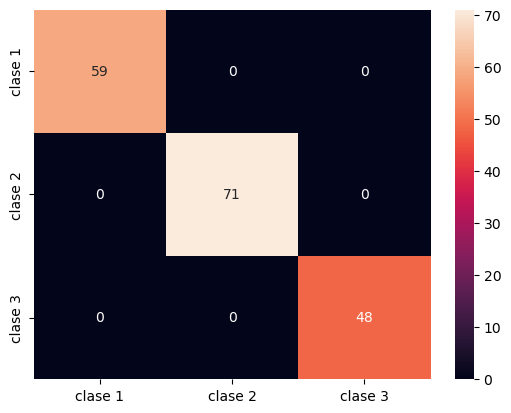

In [30]:
cmKNO = pd.DataFrame(confusion_matrix(yKN, yKNO_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmKNO, annot=True, fmt='d');

print(classification_report(yKN, yKNO_pred))

- El modelo de K-Neighbors con evaluado sobre sólo el vecino más cercano da un RMSE de 0 y una clasificación perfecta. El resto de indicadores (accuracy, precision, recall y F1 score) muestran su mejor valor, 1. 
- Se ha de tener cuidado con los resultados del KNN, ya vimos que k=1 es muy sensible a distorciones y nuestros datos están desequilibrados, es muy probable que el KNN tenga sobreajuste (over-fitting).
- Teniendo en cuanta lo anterior, el KNN con la k óptima mejora los resultados en relación al KNN con k=5. 

## Ejercicio 4

- Voy a usar la aproximación traint/test para volvar a comparar ambos modelos.  

**Random Forest**

In [31]:
XT_RF = Vinos.drop('clase',axis=1)
yT_RF = Vinos['clase']
X_train, X_test, y_train, y_test = train_test_split(XT_RF, yT_RF, test_size=0.3,random_state=109)

In [32]:
modeloRFT = RandomForestClassifier(
            n_estimators = 2,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modeloRFT.fit(X_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=2, n_jobs=-1,
                       random_state=123)

In [33]:
yTRF_pred = modeloRFT.predict(X_test)
rmseTRF = mean_squared_error(
        y_true  = y_test,
        y_pred  = yTRF_pred,
        squared = False
       )
print(f"RMSE Random Forest train/test: {(rmseTRF):6.3f}")
print('Accuracy Random Forest train/test: ', metrics.accuracy_score(y_test,yTRF_pred))

RMSE Random Forest train/test:  0.304
Accuracy Random Forest train/test:  0.9074074074074074


In [34]:
print(f"RMSE Random Forest original: {(rmse):6.3f}")
print('Accuracy Random Forest original: ', metrics.accuracy_score(yRF,yRF_pred))

RMSE Random Forest original:  0.000
Accuracy Random Forest original:  0.9269662921348315


- El modelo Random Forest con la aproximación train/test tiene un RMSE de 0.304, mejor que el RMSE de 0.327 del modelo Random Forest original (sin parámetros óptimos).
- La exactitud (accuracy) del train/test es más baja que la del modelo original, 0.907 vs 0.927. 

- Ahora busco los parámetros óptimos del modelo con la aproximación train/test. 

In [35]:
param_grid = {'n_estimators': [1, 4, 30, 150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }
gridT = GridSearchCV(
            estimator  = RandomForestClassifier(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

gridT.fit(X = X_train, y = y_train)

resultados = pd.DataFrame(gridT.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
39,20,5,150,-0.085798,0.106848,0.0,0.0
3,None,5,150,-0.085798,0.106848,0.0,0.0
27,10,5,150,-0.085798,0.106848,0.0,0.0
15,3,5,150,-0.099131,0.107784,0.0,0.0


In [36]:
print("Mejores hiperparámetros encontrados (cv)")
print(gridT.best_params_, ":", gridT.best_score_, gridT.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': None, 'max_features': 5, 'n_estimators': 150} : -0.08579779051377004 neg_root_mean_squared_error


In [37]:
modeloRFTO = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modeloRFTO.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=150, n_jobs=-1,
                       random_state=123)

In [38]:
yTRFO_pred = modeloRFTO.predict(X_test)
rmseTRF = mean_squared_error(
        y_true  = y_test,
        y_pred  = yTRFO_pred,
        squared = False
       )
print(f"RMSE Random Forest train/test: {(rmseTRF):6.3f}")
print('Accuracy Random Forest train/test: ', metrics.accuracy_score(y_test,yTRFO_pred))

RMSE Random Forest train/test:  0.236
Accuracy Random Forest train/test:  0.9444444444444444


- El Random Forest train/test óptimo arroja un RMSE de 0.236, menor que el mismo modelo sin optimizar hiperparámetros (0.304) pero peor que el Random Forest original óptimo que tiene un RMSE de 0 y que seguramente tiene sobre ajuste.
- Ahora entreno el KNeighbors con la aproximación train/test para compararlo con el Rain Forest.

**KNeighbors**

In [39]:
ModeloKNT = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree',metric='euclidean')
ModeloKNT.fit(X_train,y_train)
yKNT_pred = ModeloKNT.predict(X_test)

rmseKNT = mean_squared_error(
        y_true  = y_test,
        y_pred  = yKNT_pred,
        squared = False)

In [40]:
print(f"RMSE KNeighbords train/test: {(rmseKNT):6.3f}")
print('Accuracy KNeighbords train/test: ', metrics.accuracy_score(y_test,yKNT_pred))

RMSE KNeighbords train/test:  0.624
Accuracy KNeighbords train/test:  0.6666666666666666


In [41]:
print(f"RMSE KNeighbords original: {(rmseKN):6.3f}")
print('Accuracy KNeighbords original: ', metrics.accuracy_score(yKN,yKN_pred))

RMSE KNeighbords original:  0.576
Accuracy KNeighbords original:  0.7865168539325843


- El KNeighbors con la aproximación train/test tiene un RMSE de 0.624 y una accuracy de 0.667, ambos resultados peores que el KNeighbors original con un RMSE de 0.576 y una exactitud de 0.787. 
- Ahora bsuco encontrar la mejor K para el modelo.

In [42]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Error absoluto medio')

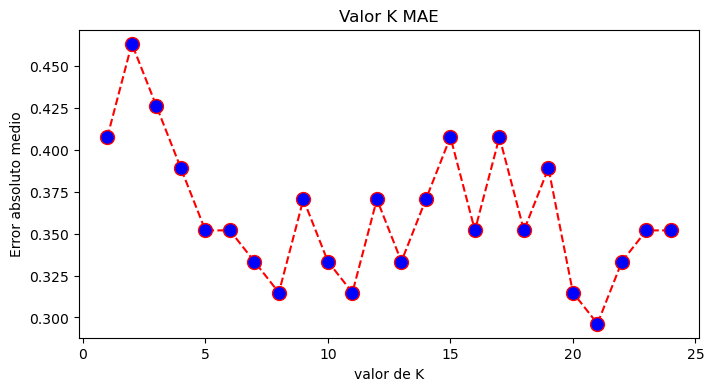

In [43]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 25), error[:24], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('Valor K MAE')
plt.xlabel('valor de K')
plt.ylabel('Error absoluto medio')

- La k óptima sería de 21. Entreno el modelo usando esa K. 

In [44]:
ModeloKNTO = KNeighborsClassifier(n_neighbors=21, algorithm='ball_tree',metric='euclidean')
ModeloKNTO.fit(X_train,y_train)
yKNTO_pred = ModeloKNTO.predict(X_test)

rmseKNTO = mean_squared_error(
        y_true  = y_test,
        y_pred  = yKNTO_pred,
        squared = False)
print(f"RMSE KNeighbords train/test óptimo: {(rmseKNTO):6.3f}")
print('Accuracy KNeighbords train/test óptimo: ', metrics.accuracy_score(y_test,yKNTO_pred))

RMSE KNeighbords train/test óptimo:  0.609
Accuracy KNeighbords train/test óptimo:  0.7407407407407407


- El KNeighbors train/test óptimo mejora los resultados respecto al mismo modelo sin la K óptima, 0.609 de RMSE vs 0.624 y 0.741 de acurracy vs 0.667. Pero no mejora los resultados respecto al modelo original (RMSE = 0.576, accuracy = 0.787) que seguramente tiene sobreajuste. 

**Comparo modelos**

**Resultados Random Forest train/test óptimo**

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        21
           2       0.94      0.89      0.92        19
           3       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54

RMSE Random Forest train/test:  0.236


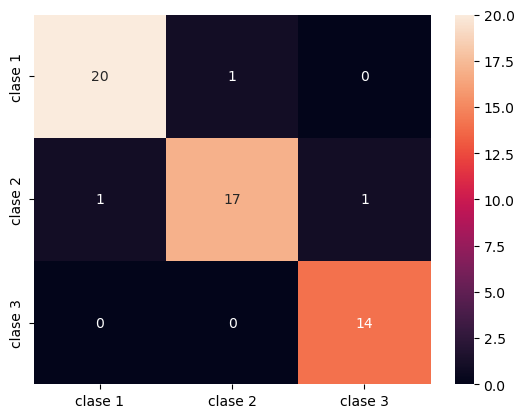

In [45]:
classes_names = ['clase 1','clase 2','clase 3']
cmRFTO = pd.DataFrame(confusion_matrix(y_test, yTRFO_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmRFTO, annot=True, fmt='d');

print(classification_report(y_test, yTRFO_pred))
print(f"RMSE Random Forest train/test: {(rmseTRF):6.3f}")

**Resultados KNeighbors train/test óptimo**

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        21
           2       0.71      0.63      0.67        19
           3       0.62      0.71      0.67        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

RMSE KNeighbords train/test óptimo:  0.609


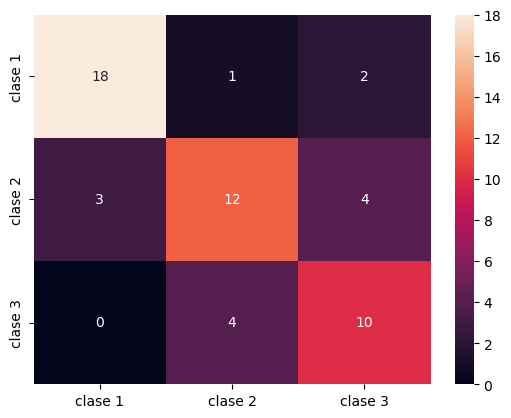

In [46]:
cmKNTO = pd.DataFrame(confusion_matrix(y_test, yKNTO_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmKNTO, annot=True, fmt='d');

print(classification_report(y_test, yKNTO_pred))
print(f"RMSE KNeighbords train/test óptimo: {(rmseKNTO):6.3f}")

- El RMSE del Random Forest de 0.236 unidades es bastante mejor que el del KNeighbors de 0.609. 
- Así mismo todos los indicadores (accuracy, precision y el F1-score) del modelo Random Forest son mejores que en el KNeighbors. 
- En las matrices de confusión también se observa que el random forest clasifica mejor que el KNeigbors: 
    - En el Random Forest sólo una observación de la clase uno se confunde con la dos y dos observaciones de la clase dos se confunden, una con la clase 1 y una con la 2. Tiene una ligera tendencia a fallar más en la clasificación de falsos positivos y la clase tres está perfectamente clasificada. 
    - El KNeighbors confunde tres datos de la clase 1 (1 con la 2 y 2 con la 3), 7 de la clase 2 (3 con la 1 y 4 con la 3) y 4 de la clase 3 (4 con la clase 2). Falla por igual en positivo que en negativo y la clase mejor clasificada es la clase 1. 
- La **conclusión** es que el modelo que mejor clasifica los vinos es el Random Forest con la aproximación train/test y los parámetros óptimos. El Random Forest sin train/test tiene mejores indicadores de clasificación y de error medio pero sin la aproximación trin/test y sin la valoración cruzada seguramente tiene sobre ajuste. 

## Ejercicio 5

- Aplico robust scaler y comparo los resultados de ambos modelos con sus hiperparámetros óptimos y la aproximación train/test. 

In [84]:
XT_RF = Vinos.drop('clase',axis=1)
yT_RF = Vinos['clase']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(XT_RF, yT_RF, test_size=0.3,random_state=109)

In [85]:
scaler = RobustScaler()
scaler.fit(Xs_train)
Xs_train = scaler.transform(Xs_train)
Xs_test = scaler.transform(Xs_test)

**Random Forest**

In [86]:
param_grid = {'n_estimators': [1, 4, 30, 150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }
gridTs = GridSearchCV(
            estimator  = RandomForestClassifier(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

gridTs.fit(X = Xs_train, y = ys_train)

resultados = pd.DataFrame(gridTs.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
39,20,5,150,-0.085798,0.106848,0.0,0.0
3,None,5,150,-0.085798,0.106848,0.0,0.0
27,10,5,150,-0.085798,0.106848,0.0,0.0
15,3,5,150,-0.099131,0.107784,0.0,0.0


In [87]:
print("Mejores hiperparámetros encontrados (cv)")
print(gridTs.best_params_, ":", gridTs.best_score_, gridTs.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': None, 'max_features': 5, 'n_estimators': 150} : -0.08579779051377004 neg_root_mean_squared_error


In [100]:
modeloRFs = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = None,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modeloRFs.fit(Xs_train,ys_train)

yRFs_pred = modeloRFs.predict(Xs_test)
rmseRFs = mean_squared_error(
        y_true  = ys_test,
        y_pred  = yRFs_pred,
        squared = False
       )
print(f"RMSE Random Forest transformado: {(rmseRFs):6.3f}")
print('Accuracy Random Forest transformado: ', round(metrics.accuracy_score(ys_test,yRFs_pred),3))

RMSE Random Forest transformado:  0.236
Accuracy Random Forest transformado:  0.944


- El modelo Rain Forest óptimo con el escalado de variables y aproximación train/test, arroja resultados iguales que el mismo modelo pero sin el escalado de variables, un RMSE de 0.236 y un accuracy de 0.94. Ambos buenos resultados.  

**KNeighbors**

In [90]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xs_train,ys_train)
    pred_i = knn.predict(Xs_test)
    mae = mean_absolute_error(ys_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Error absoluto medio')

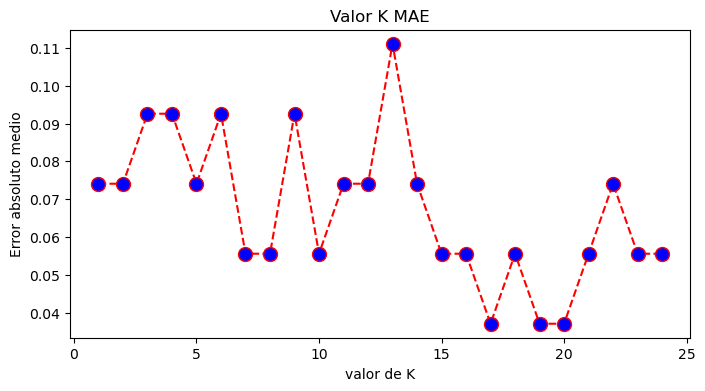

In [91]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 25), error[:24], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('Valor K MAE')
plt.xlabel('valor de K')
plt.ylabel('Error absoluto medio')

- En este caso encontramos tres k óptimas (las que minimizan el error absoluto medio), con valores de 17, 19 y 20. Tomaré 17 vecinos que ayuda a reducir la carga de trabajo para el ordenador. 

In [101]:
ModeloKNs = KNeighborsClassifier(n_neighbors=17, algorithm='ball_tree',metric='euclidean')
ModeloKNs.fit(Xs_train,ys_train)
yKNs_pred = ModeloKNs.predict(Xs_test)

rmseKNs = mean_squared_error(
        y_true  = ys_test,
        y_pred  = yKNs_pred,
        squared = False)
print(f"RMSE KNeighbords transformado: {(rmseKNs):6.3f}")
print('Accuracy KNeighbords transformado: ', metrics.accuracy_score(ys_test,yKNs_pred))

RMSE KNeighbords transformado:  0.192
Accuracy KNeighbords transformado:  0.9629629629629629


In [102]:
print(f"RMSE KNeighbords train/test óptimo: {(rmseKNTO):6.3f}")
print('Accuracy KNeighbords train/test óptimo: ', metrics.accuracy_score(y_test,yKNTO_pred))

RMSE KNeighbords train/test óptimo:  0.609
Accuracy KNeighbords train/test óptimo:  0.7407407407407407


- A diferencia del Rain Forest que con el escalado de variables y optimizando parámetros no mejoró los resultados del modelo óptimo sin escalado (ambos con train/test), el modelo KNeighbors transformado mejora significactivamente sus resultados al escalar las variables, el RMSE pasa de 0.609 a 0.192 y la exactitud pasa de 0.74 a 0.96. 

**Comparo modelos**

**Resultados Rain Forest con variables escaladas**

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        21
           2       0.94      0.89      0.92        19
           3       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54

RMSE Random Forest transformado:  0.236


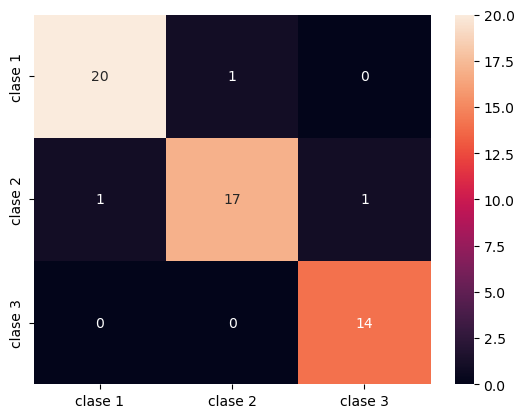

In [97]:
classes_names = ['clase 1','clase 2','clase 3']
cmRFs = pd.DataFrame(confusion_matrix(ys_test, yRFs_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmRFs, annot=True, fmt='d');

print(classification_report(ys_test, yRFs_pred))
print(f"RMSE Random Forest transformado: {(rmseRFs):6.3f}")

**Resultados KNeighbors con variables escaladas**

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54

RMSE KNeighbords train/test óptimo:  0.192


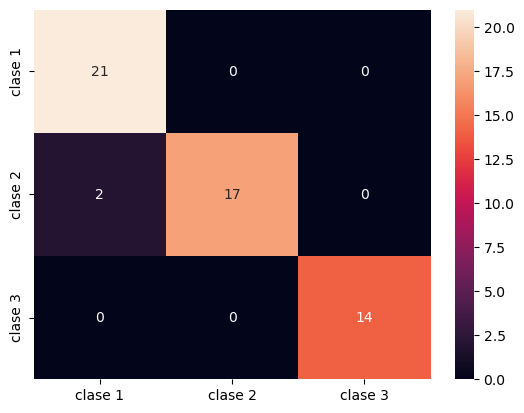

In [95]:
cmKNs = pd.DataFrame(confusion_matrix(ys_test, yKNs_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cmKNs, annot=True, fmt='d');

print(classification_report(ys_test, yKNs_pred))
print(f"RMSE KNeighbords train/test óptimo: {(rmseKNs):6.3f}")

- Con el escalado de variables, todos los indicadores generales (RMSE y accuracy) y por clase (precision, recall y f1-score) son mejores en el modelo KNeighbors que en el Random Forest, es decir, el KNeigbors mejoró tanto sus resultados con el escalado de variables que superó al Random Forest para clasificar los vinos. 
- La matriz de confusión del modelo KNeighbors también es mejor que la del Random Forest. El KNN falla en clasificar dos observaciones en falso negativo, confunde esas dos observaciones de la clase 2 con la clase 1, mientras que el Rain Forest falla en clasificar tres observaciones y hace más falsos positivos, confunde una observación de la clase 1 con la clase 2 y dos observaciones de la clase 2, una con la clase 3 y un falso negativo con la clase 1. 
- Como **conclusión**, para clasificar los vinos, el mejor modelo de los dos analizados sería el KNeighbors óptimo con la aproximación train/test y escalando variables. 